## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

Question 1

In [2]:
import pandas as pd 

var_list = ['year', 'hrs2', 'wrkstat', 'commute', 'marital', 'sphrs2', 'childs','age', 'educ','major1','sex', 'race', 'income' ] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

Question 2

The dataset I have chosen from the GSS survey includes a carefully selected mix of demographic, socioeconomic, and work-related variables that together provide a comprehensive picture of American life over time. The variable "year" allows for longitudinal analysis, giving insights into how attitudes and behaviors have evolved since the survey began in the 1970s. This temporal dimension is critical for understanding shifts in work culture, social norms, and economic conditions.

Key work-related variables such as "hrs2" (the number of hours worked per week), "wrkstat" (work status), and "sphrs2" (hours spouse works) form the cornerstone of labor market analysis. "hrs2" is essential in assessing overall labor supply and determining the intensity of work among respondents. By comparing it with "sphrs2," one can explore intra-household dynamics and the distribution of work responsibilities between partners. Meanwhile, "wrkstat" provides a categorical perspective on employment status, distinguishing between full-time, part-time, and non-working individuals, which is crucial for understanding the economic engagement of different groups.

Additional variables like "commute" offer insights into the daily logistics and potential stressors associated with work, while "marital" and "childs" enrich the dataset by capturing family structure and responsibilities. Demographic factors such as "age," "educ," "major1" (area of study), "sex," and "race" allow for segmentation of the data to analyze how work and life experiences differ across various social groups. Lastly, "income" is a key measure of economic well-being that ties all these aspects together.

Question 3

In [6]:
gss_data = pd.read_csv(output_filename) # Load the combined CSV file for cleaning and EDA
print("Initial DataFrame shape:", gss_data.shape)

# ----------------------- Data Cleaning Steps -----------------------

print("Missing values per column:") # checks for missing values
print(gss_data.isnull().sum())

gss_data.drop_duplicates(inplace=True)  # remove duplicate rows
print("Shape after dropping duplicates:", gss_data.shape)

numeric_columns = ['year', 'hrs2', 'sphrs2', 'childs', 'age', 'educ', 'income'] # ensuring numeric columns
for col in numeric_columns:
    gss_data[col] = pd.to_numeric(gss_data[col], errors='coerce')


cols_to_drop = ['hrs2', 'commute', 'sphrs2', 'major1', 'income'] 
# dropping 'hrs2', 'commute', 'sphrs2', and 'major1' since these columns were missing approx. 90% of the data
gss_data.drop(columns=cols_to_drop, inplace=True)
print("Columns after dropping unwanted ones:", gss_data.columns.tolist())


print("Cleaned DataFrame summary:") # Inspecting the cleaned data with summary statistics
print(gss_data.describe(include='all'))


print("Cleaned DataFrame preview:")
print(gss_data.head())
gss_data.to_csv('cleaned_selected_gss_data.csv', index=False)

Initial DataFrame shape: (72390, 13)
Missing values per column:
year           0
hrs2       70989
wrkstat       36
commute    71060
marital       51
sphrs2     71715
childs       261
age          769
educ         263
major1     65165
sex          112
race         107
income      8951
dtype: int64
Shape after dropping duplicates: (70327, 13)
Columns after dropping unwanted ones: ['year', 'wrkstat', 'marital', 'childs', 'age', 'educ', 'sex', 'race']
Cleaned DataFrame summary:
                year            wrkstat  marital        childs           age  \
count   70327.000000              70291    70276  70067.000000  69571.000000   
unique           NaN                  8        5           NaN           NaN   
top              NaN  working full time  married           NaN           NaN   
freq             NaN              33701    36214           NaN           NaN   
mean     1997.737938                NaN      NaN      1.934063     46.796539   
std        15.155365                NaN  

Question 4

Data shape: (70327, 8)
Numeric Summary:
               year        childs           age          educ
count  70327.000000  70067.000000  69571.000000  70067.000000
mean    1997.737938      1.934063     46.796539     13.020595
std       15.155365      1.770837     17.637707      3.208155
min     1972.000000      0.000000     18.000000      0.000000
25%     1985.000000      0.000000     32.000000     12.000000
50%     1998.000000      2.000000     45.000000     12.000000
75%     2010.000000      3.000000     60.000000     16.000000
max     2022.000000      8.000000     89.000000     20.000000

Value counts for 'wrkstat':
wrkstat
working full time                                                             33701
retired                                                                       10772
keeping house                                                                 10570
working part time                                                              7332
unemployed, laid off, looking

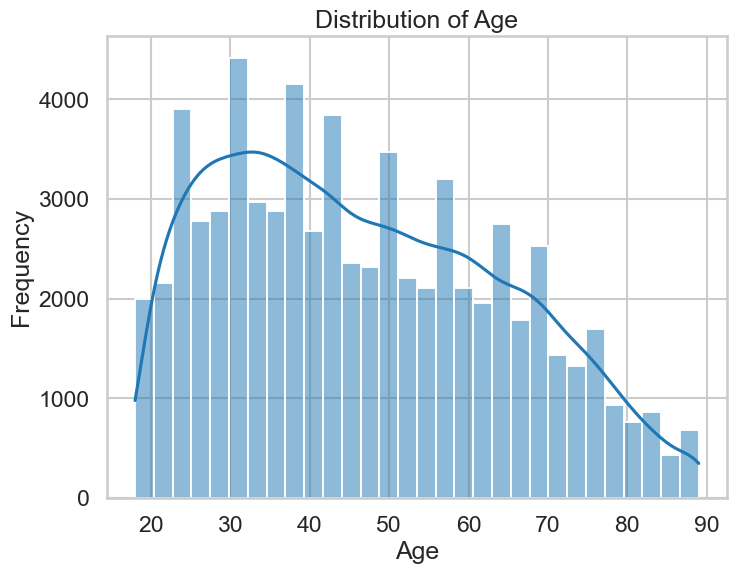

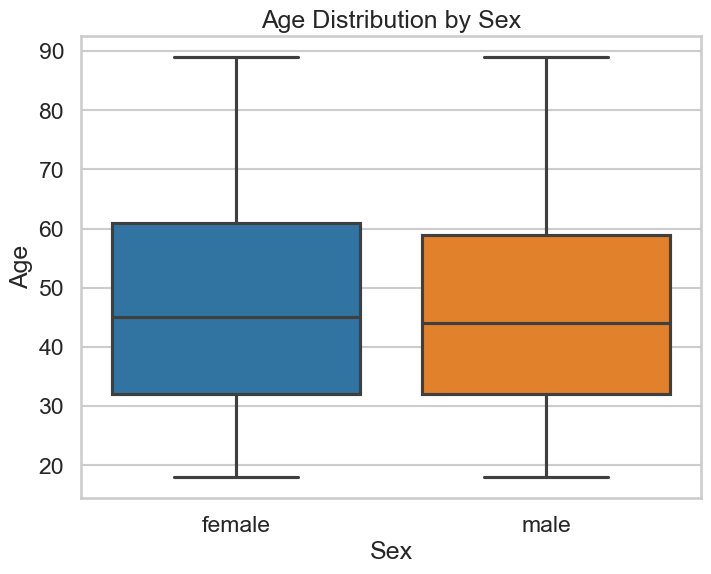

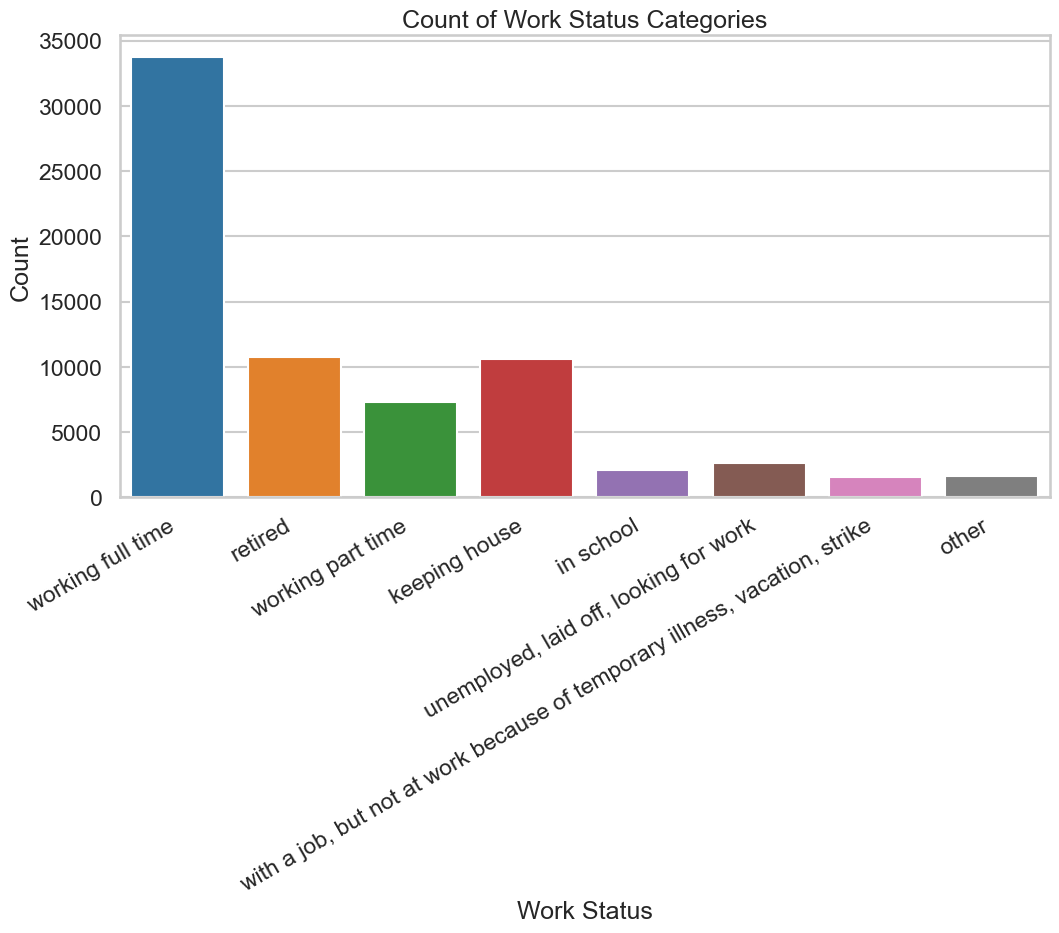

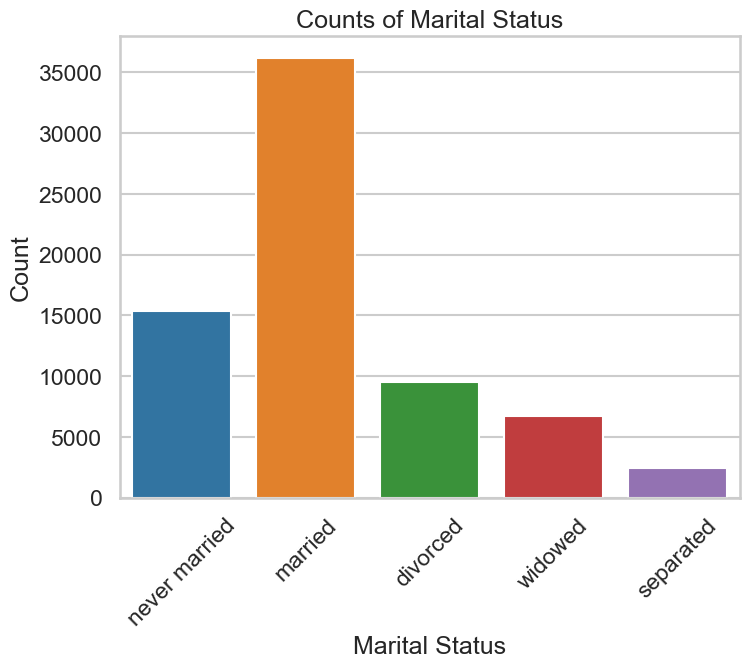

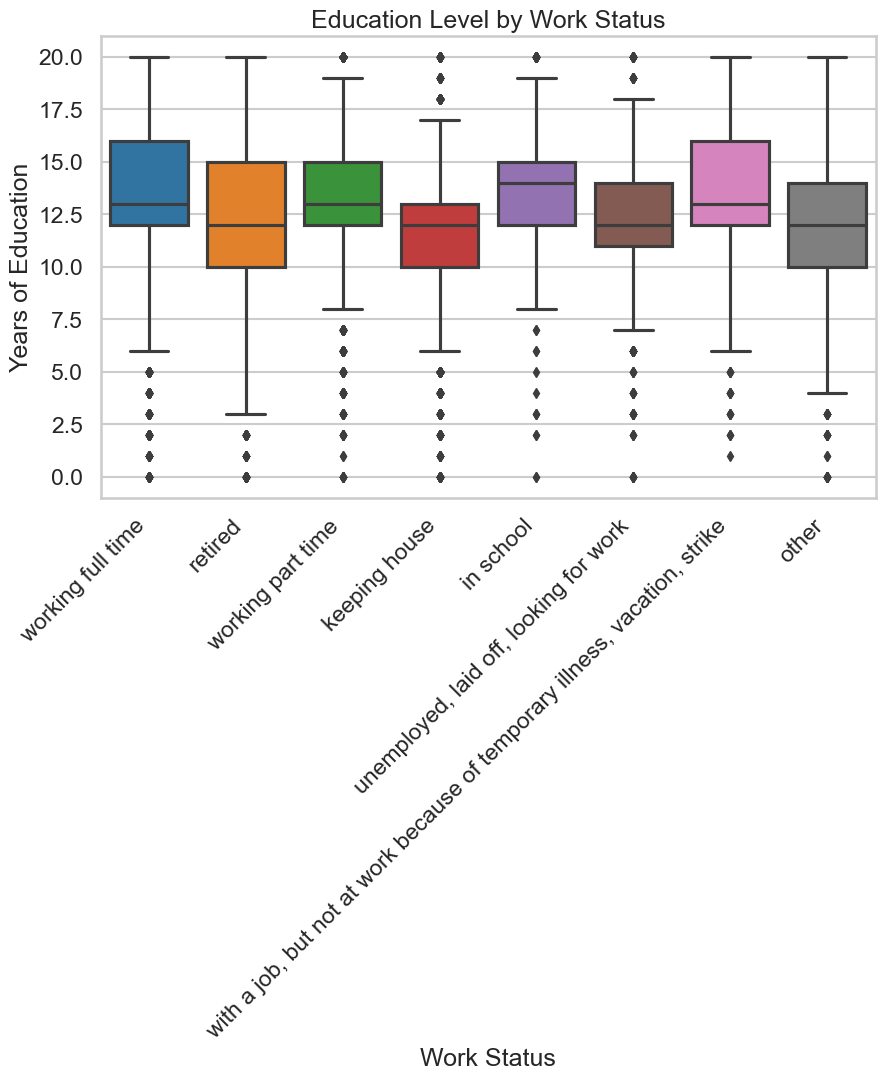

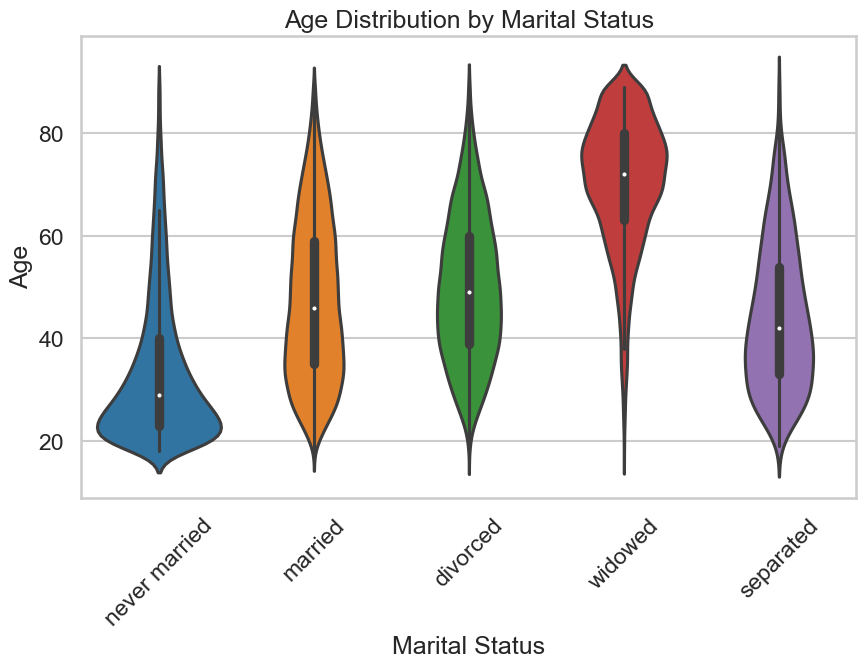

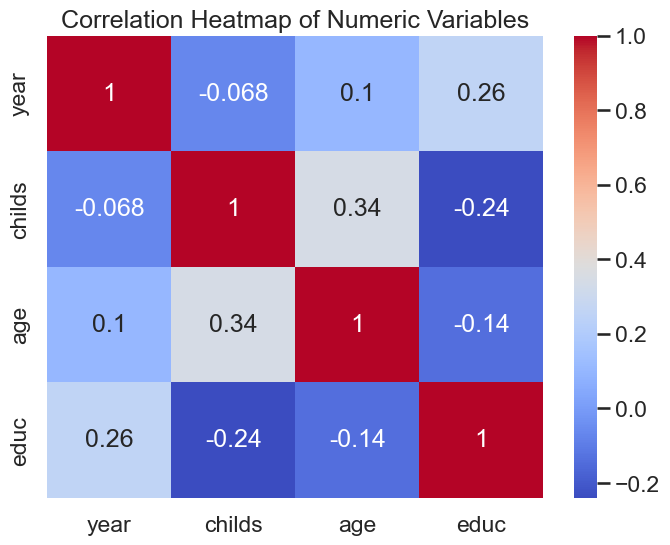

<Figure size 1200x600 with 0 Axes>

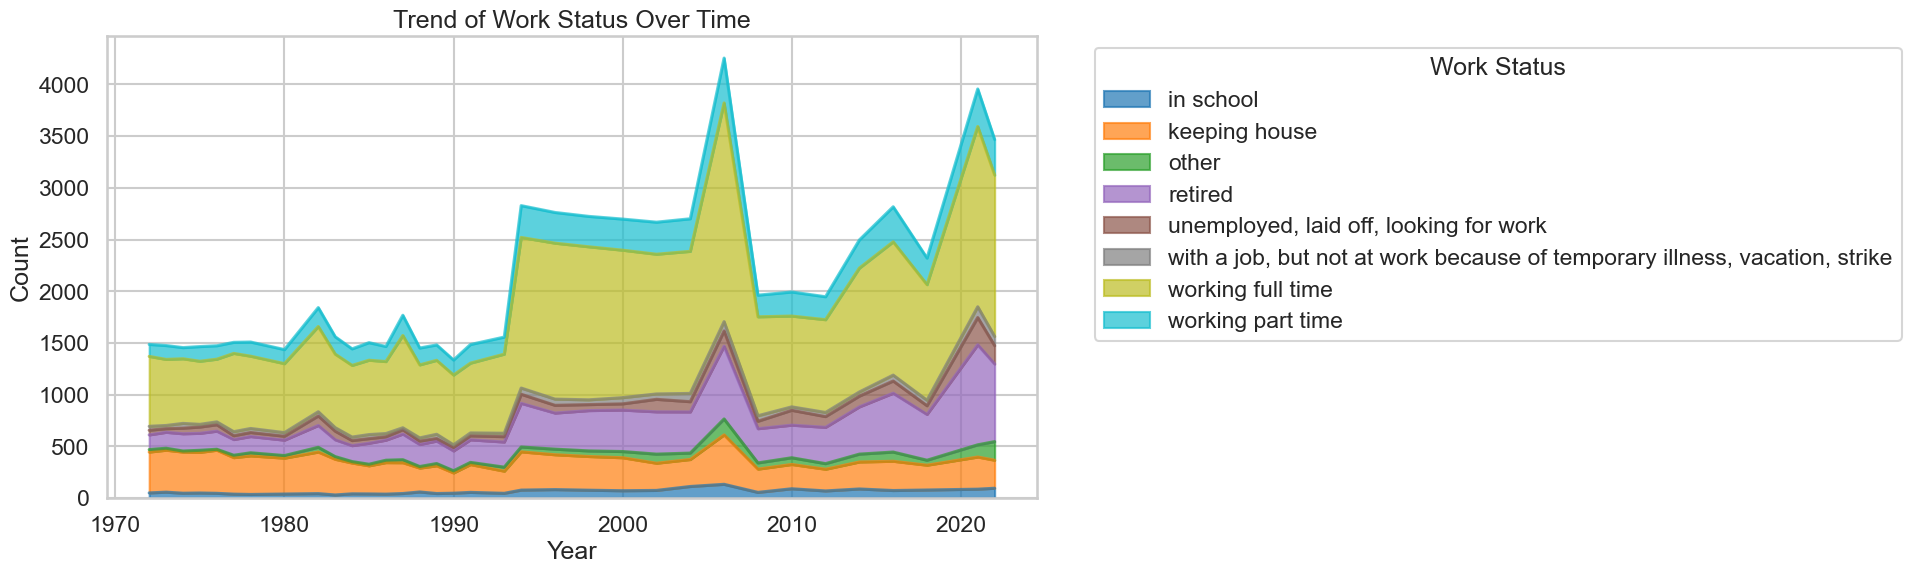

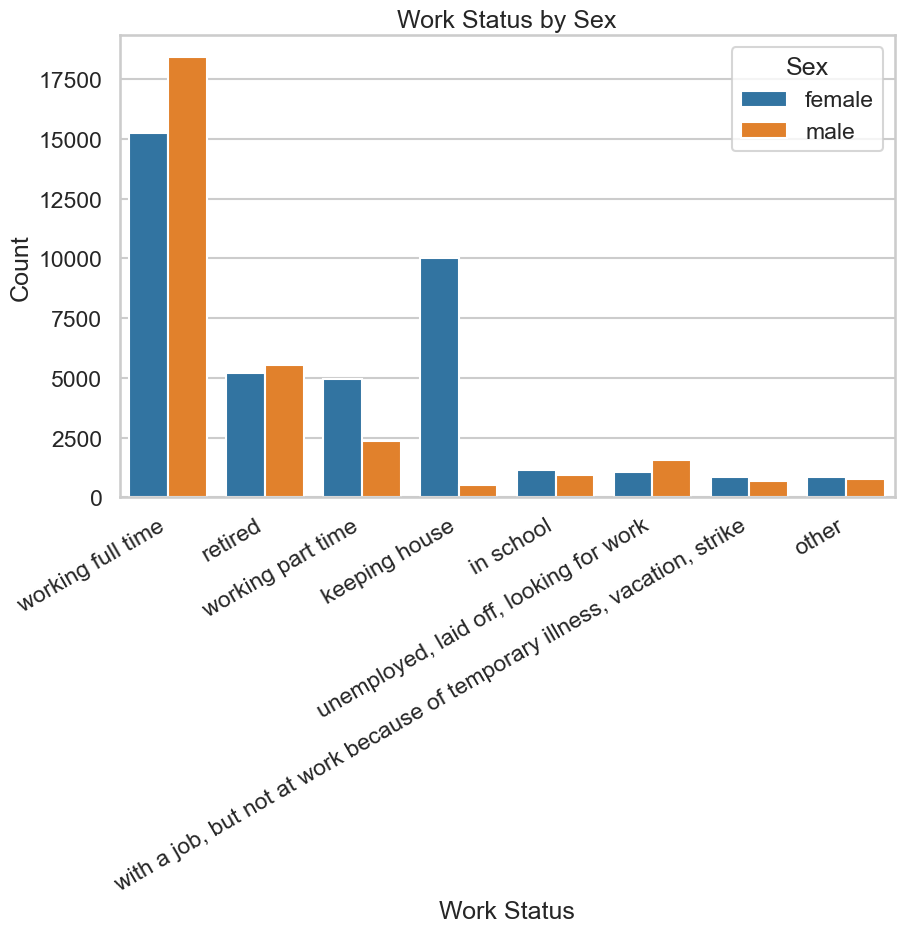

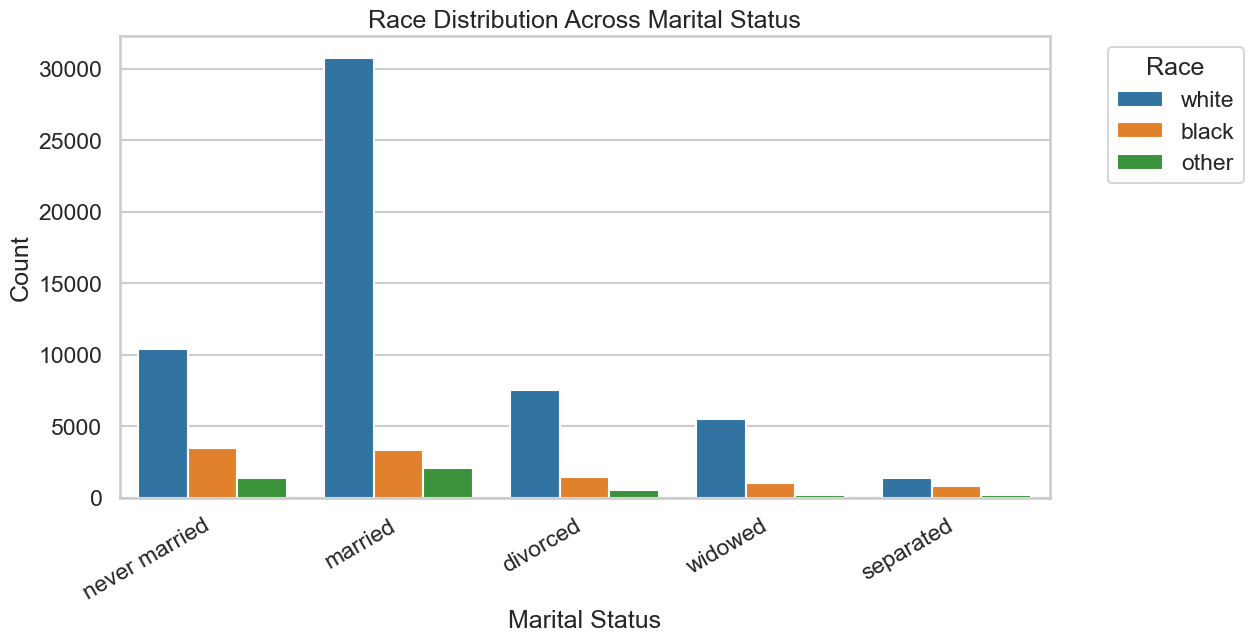

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaned_selected_gss_data.csv')
print("Data shape:", df.shape)

# ---------------- Numeric Summaries ----------------
numeric_columns = ['year', 'childs', 'age', 'educ']
print("Numeric Summary:")
print(df[numeric_columns].describe())

categorical_columns = ['wrkstat', 'marital', 'sex', 'race']
for col in categorical_columns:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())

# ---------------- Visualizations ----------------
sns.set_style('whitegrid') # clean style for the plots
sns.set_context('talk')

# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Age Distribution by Sex
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='age', data=df)
plt.title('Age Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

# Work Status counts
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='wrkstat', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.title('Count of Work Status Categories')
plt.xlabel('Work Status')
plt.ylabel('Count')

# Counts of Marital Status categories
plt.figure(figsize=(8, 6))
sns.countplot(x='marital', data=df)
plt.title('Counts of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Education (years) by Work Status
plt.figure(figsize=(10, 6))
boxplt = sns.boxplot(x='wrkstat', y='educ', data=df)
boxplt.set_xticklabels(boxplt.get_xticklabels(), rotation=30, ha='right')
plt.title('Education Level by Work Status')
plt.xlabel('Work Status')
plt.ylabel('Years of Education')
plt.xticks(rotation=45)
plt.show()

# Distribution of Age across Marital Statuses
plt.figure(figsize=(10, 6))
sns.violinplot(x='marital', y='age', data=df)
plt.title('Age Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

# Correlation Heatmap for Numeric Variables
plt.figure(figsize=(8, 6))
corr = df[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

# Area Plot of Work Status Over Time
plt.figure(figsize=(12, 6))
wrkstat_trend = df.groupby(['year', 'wrkstat']).size().unstack()
wrkstat_trend.plot(kind='area', stacked=True, figsize=(12, 6), colormap='tab10', alpha=0.7)
plt.title('Trend of Work Status Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title="Work Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Work Status by Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='wrkstat', hue='sex', data=df)
plt.title('Work Status by Sex')
plt.xlabel('Work Status')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.legend(title="Sex")
plt.show()

# Race Distribution by Marital Status
plt.figure(figsize=(12, 6))
sns.countplot(x='marital', hue='race', data=df)
plt.title('Race Distribution Across Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Question 5

The histogram of age shows that the distribution is right-skewed, meaning there are fewer older respondents than younger ones. The peak occurs around ages 30 to 40, which likely reflects a working-age population that dominates the sample. The presence of a smooth density curve helps visualize the overall pattern, showing a gradual decline in frequency as age increases beyond middle age. The boxplot comparing age distribution by sex reveals that the median ages for both males and females are similar, with a broad range spanning from approximately 20 to 90 years. Both distributions have outliers at the lower end, likely reflecting younger respondents who may still be in school or have limited work experience.

The count plot of work status categories highlights that “working full-time” is the most common category, followed by “retired” and “keeping house.” This distribution aligns with general employment trends in the U.S., where full-time employment is the norm for working-age individuals, while retirement accounts for a significant portion of older respondents. The relatively lower counts of “unemployed, laid off, looking for work” suggest that, at least in this dataset, the majority of respondents are either working or retired. The trend plot of work status over time illustrates changes in employment patterns. There is notable variation in the number of full-time workers, which appears to decrease at certain points, possibly reflecting economic downturns or demographic shifts. Other categories, such as “in school” and “keeping house,” remain relatively stable over time, suggesting that these lifestyle choices have not changed significantly across different years. The bar plot of work status by sex reveals distinct gender differences in employment. Males are more likely to be working full-time compared to females, while females have higher representation in the “keeping house” category. This finding aligns with traditional gender roles, where women have historically taken on more domestic responsibilities, though societal trends have been shifting over time.

The count plot of marital status shows that “married” is the most common category, followed by “never married” and “divorced.” This is consistent with broader societal trends, where marriage remains the dominant relationship structure, but a significant number of individuals remain single or experience divorce. The relatively low counts of “widowed” and “separated” reflect their more limited occurrence in the population. The violin plot displaying the age distribution across marital status categories provides additional insights. Those who are “never married” are concentrated at younger ages, which is expected since many people marry later in life. Meanwhile, those in the “widowed” category are generally older, reflecting the natural aging process and loss of spouses over time. The broader age distribution in the “married” category suggests that marriage spans across multiple generations, from young adults to seniors. The bar plot illustrating race distribution across marital status categories reveals that white respondents are more likely to be married than other racial groups. The proportion of “never married” individuals is higher among Black and “other” racial categories, which may reflect structural and cultural differences in marriage rates.

The boxplot showing education level by work status highlights distinct patterns. Those “in school” tend to have a wider range of education levels, which is expected since the category includes students at various stages of education. Full-time workers and those unemployed generally have median education levels around 12-16 years, corresponding to high school and college education. Retired individuals have a slightly lower median education level, likely reflecting generational differences in educational attainment. 